# Data Preprocessing

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
# loading...
traindf, testdf = pd.read_csv('train.csv'), pd.read_csv('test.csv')
print('traindf', len(traindf))
print('testdf', len(testdf))

traindf 91531
testdf 27859


In [87]:
traindf

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,-6.305161,0,0,Check-Out,2015-07-01
1,1,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,75.052227,0,0,Check-Out,2015-07-03
2,2,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,74.546401,0,0,Check-Out,2015-07-03
3,3,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,76.376288,0,0,Check-Out,2015-07-03
4,4,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,49.411647,0,0,Check-Out,2015-07-03
5,5,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,92.832887,0,0,Check-Out,2015-07-03
6,6,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,80.667361,0,0,Check-Out,2015-07-03
7,7,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,71.138396,0,0,Check-Out,2015-07-03
8,8,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,63.114261,0,0,Check-Out,2015-07-03
9,9,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,44.073611,0,0,Check-Out,2015-07-03


In [88]:
traindf.dtypes

ID                                  int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

In [89]:
testdf.dtypes

ID                                  int64
hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## *Encoding Method*

* `is_canceled; adr; reservation_status; reservation_status_date` are not in testdf

In [107]:
traindf.isna().sum() #NaN

ID                                    0
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             468
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13217


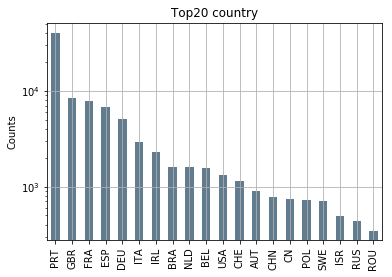

In [108]:
df['country'].value_counts()[0:20].plot.bar(grid=True, color='#607c8e')
plt.title('Top20 country')
plt.ylabel('Counts')
plt.yscale('log')

In [11]:
def encoding(dataframe, train=True):
    df = dataframe.copy()
    df.drop('ID', inplace=True, axis=1)
    df.drop('arrival_date_year', inplace=True, axis=1)
    if train:
        df.drop('reservation_status', inplace=True, axis=1)
        df.drop('reservation_status_date', inplace=True, axis=1)
    df['hotel'] = df.hotel.map(lambda x: 1 if x == 'City Hotel' else 0)
    
    #arrival_month
    possiblecat = 'January,February,March,April,May,June,July,August,September,October,November,December'.split(',')
    df['arrival_date_month'] = df['arrival_date_month'].astype('category', categories=possiblecat)
    df = pd.get_dummies(df, columns=['arrival_date_month'], dummy_na=False)
    
    df = pd.get_dummies(df, columns=['meal'], dummy_na=False)
    df['country'] = df.country.map(lambda x: 'Others' 
                               if x not in ['PRT','GBR','FRA','ESP','DEU','ITA','IRL','BRA','NLD','BEL','USA','CHE'] 
                               else x)
    df = pd.get_dummies(df, columns=['country'], dummy_na=False)
    
    # market_segment
    possiblecat = ['Online TA','Offline TA/TO','Groups','Direct','Corporate','Complementary','Aviation','Undefined']
    df['market_segment'] = df['market_segment'].astype('category', categories=possiblecat)
    df = pd.get_dummies(df, columns=['market_segment'], dummy_na=False)
    
    # distribution_channel
    possiblecat = ['TA/TO','Direct','Corporate','GDS','Undefined']
    df['distribution_channel'] = df['distribution_channel'].astype('category', categories=possiblecat)
    df = pd.get_dummies(df, columns=['distribution_channel'], dummy_na=False)
    
    #reserved_room_type & assigned_room_type
    possiblecat = list('ABCDEFGHIJKL')
    df['reserved_room_type'] = df['reserved_room_type'].astype('category', categories=possiblecat)
    df['assigned_room_type'] = df['assigned_room_type'].astype('category', categories=possiblecat)
    df = pd.get_dummies(df, columns=['reserved_room_type'], dummy_na=False)
    df = pd.get_dummies(df, columns=['assigned_room_type'], dummy_na=False)
    
    df = pd.get_dummies(df, columns=['deposit_type'], dummy_na=False)
    df['agent'] = df.agent.map(lambda x: 1 if x else 0)
    df['company'] = df.company.map(lambda x: 1 if x else 0)
    df = pd.get_dummies(df, columns=['customer_type'], dummy_na=False)
    
    #outcome variables
    if train:
        adr = df['adr']
        cancel = df['is_canceled']
    
        df.drop('adr', inplace=True, axis=1)
        df.drop('is_canceled', inplace=True, axis=1)
    
    df = df.fillna(0)
    
    if train:
        return df, adr, cancel
    else:
        return df

In [12]:
df, adr, cancel = encoding(traindf)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


In [127]:
df.dtypes

hotel                               int64
lead_time                           int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                               int64
company                             int64
days_in_waiting_list                int64
required_car_parking_spaces         int64
total_of_special_requests           int64
arrival_date_month_April            uint8
arrival_date_month_August           uint8
arrival_date_month_December         uint8
arrival_date_month_February         uint8
arrival_date_month_January          uint8
arrival_date_month_July           

In [128]:
df.isna().sum().sum()

0

## Observations

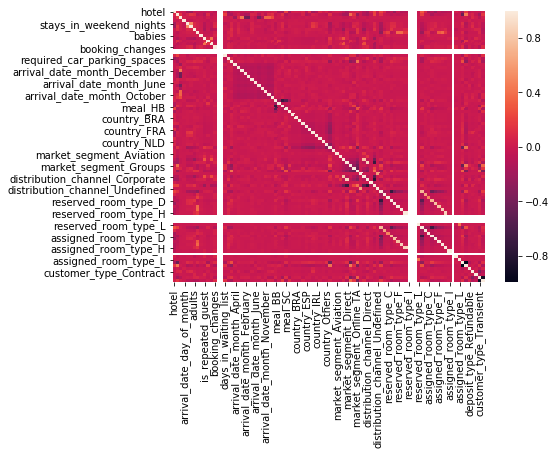

In [133]:
import seaborn as sns
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

# Predict `adr`, Just Try

In [83]:
from sklearn.model_selection import train_test_split as ts


X_train, X_test, y_train, y_test = ts(df,adr,test_size=0.3)

In [84]:
from sklearn import svm

modelsvm = svm.SVR(kernel='rbf').fit(X_train,y_train)
print(modelsvm.score(X_test,y_test))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.26990236618239305


In [135]:
from sklearn.ensemble import GradientBoostingRegressor

modelest = GradientBoostingRegressor(n_estimators=1000, 
                                     learning_rate=0.1, 
                                     max_depth=10, 
                                     random_state=0, 
                                     loss='ls').fit(X_train, y_train)

print(modelest.score(X_test,y_test))

0.8105879096881067


In [137]:
from xgboost import XGBRegressor

modelXGBR = XGBRegressor(n_estimators=2000, learning_rate =0.01, max_depth=22, min_child_weight=11, gamma=0.2,
                     colsample_bytree=0.6, subsample=0.9, reg_alpha=0.1, reg_lambda=1e-05).fit(X_train, y_train)

print(modelXGBR.score(X_test,y_test))

0.8490901910929936
